In [1]:
import pyomo
import pyomo.environ as pyo



In [3]:
model= pyo.ConcreteModel()
model.x1=pyo.Var()
model.x2=pyo.Var()

# Objective
model.obj=pyo.Objective(expr=50*model.x1+100*model.x2, sense=pyo.minimize)

# Constraints
def rule1(model):
    return 7*model.x1+2*model.x2>=28

model.eq1=pyo.Constraint(rule=rule1, doc="Constraint 1")

def rule2(model):
    return 2*model.x1+12*model.x2>=24


model.eq2=pyo.Constraint(rule=rule2, doc="Constraint 2")

#Solver
solver = pyo.SolverFactory('glpk')
solution = solver.solve(model)
#display(model)


solution.write()
print("\n ----RESULTS---- \n")
print("Objective Function=", model.obj())
print("X1=", model.x1())
print("X2=", model.x2())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 320.0
  Upper bound: 320.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Number of nonzeros: 5
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.015820026397705078
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

In [4]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

# declare decision variables
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# declare objective
model.profit = Objective(expr = 40*model.x + 30*model.y, sense=maximize)

# declare constraints
model.demand = Constraint(expr = model.x <= 40)
model.laborA = Constraint(expr = model.x + model.y <= 80)
model.laborB = Constraint(expr = 2*model.x + model.y <= 100)

model.pprint()


2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 40*x + 30*y

3 Constraint Declarations
    demand : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :    x :  40.0 :   True
    laborA : Size=1, Index=None, Active=True
        Key  : Lower : Body  : Upper : Active
        None :  -Inf : x + y :  80.0 :   True
    laborB : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x + y : 100.0 :   True

6 Declarations: x y profit demand laborA laborB


In [5]:
#%apt-get install -y -qq glpk-utils

In [6]:

solver = SolverFactory('glpk')
solution = solver.solve(model)
display(model)

# display solution
print('\nProfit = ', model.profit())

print('\nDecision Variables')
print('x = ', model.x())
print('y = ', model.y())

print('\nConstraints')
print('Demand  = ', model.demand())
print('Labor A = ', model.laborA())
print('Labor B = ', model.laborB())

Model unknown

  Variables:
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  20.0 :  None : False : False : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  60.0 :  None : False : False : NonNegativeReals

  Objectives:
    profit : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 2600.0

  Constraints:
    demand : Size=1
        Key  : Lower : Body : Upper
        None :  None : 20.0 :  40.0
    laborA : Size=1
        Key  : Lower : Body : Upper
        None :  None : 80.0 :  80.0
    laborB : Size=1
        Key  : Lower : Body  : Upper
        None :  None : 100.0 : 100.0

Profit =  2600.0

Decision Variables
x =  20.0
y =  60.0

Constraints
Demand  =  20.0
Labor A =  80.0
Labor B =  100.0


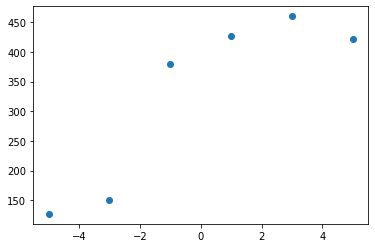

In [7]:
# Data Points
import pandas as pd
x=[-5, -3,-1,5,3, 1]
y=[127,151, 379, 421, 460, 426]
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()



In [8]:
X=pd.DataFrame(x)
X=X.to_dict
Y=pd.DataFrame(y, columns=None)


idx= [ i for i in range (0,len(x))] 
X={}

X = {}
Y={}
for i in range(len(x)):
        X[i+1] = x[i]
        Y[i+1] = y[i]
print(X)
print(Y)

{1: -5, 2: -3, 3: -1, 4: 5, 5: 3, 6: 1}
{1: 127, 2: 151, 3: 379, 4: 421, 5: 460, 6: 426}


In [9]:
X

{1: -5, 2: -3, 3: -1, 4: 5, 5: 3, 6: 1}

In [20]:
Y

{1: 127, 2: 151, 3: 379, 4: 421, 5: 460, 6: 426}

In [58]:
# Optimization problem
# Model Definition
model_linear=pyo.ConcreteModel()
model_nonlinear=pyo.ConcreteModel()
  
    
# Set declaration
model_linear.m = pyo.RangeSet(6)
model_nonlinear.m = pyo.RangeSet (6)


# Variable definition
model_linear.a1 = pyo.Var(domain=pyo.Reals)
model_linear.a2 = pyo.Var(domain=pyo.Reals)

model_nonlinear.b1 = pyo.Var(domain=pyo.Reals, initialize= 500)
model_nonlinear.b2 = pyo.Var(domain=pyo.Reals, initialize= -150)
model_nonlinear.b3 = pyo.Var(domain=pyo.Reals, initialize= -0.2)


# Parameters

model_linear.datapoints_y=pyo.Param(model_linear.m, initialize = Y)
model_linear.datapoints_x=pyo.Param(model_linear.m, initialize = X)


model_nonlinear.datapoints_y=pyo.Param(model_nonlinear.m, initialize = Y)
model_nonlinear.datapoints_x=pyo.Param(model_nonlinear.m, initialize = X)



# Objective Function
model_linear.obj = pyo.Objective(expr=  
                                 sum((model_linear.datapoints_y[m]-(model_linear.a1+ 
                                 model_linear.a2*model_linear.datapoints_x[m]))**2 
                                 for m in model_linear.m), sense = pyo.minimize)


model_nonlinear.obj = pyo.Objective(expr=
                                sum((model_nonlinear.datapoints_y[m]-
                                (model_nonlinear.b1+
                                model_nonlinear.b2*pyo.exp(model_nonlinear.b3*model_linear.datapoints_x[m])))**2 
                                for m in model_nonlinear.m), sense=pyo.minimize)

# SOLVER
results= pyo.SolverFactory ("ipopt").solve(model_linear)


results.write()
print(" \n Results \n")

print("OBJ=", model_linear.obj())
print("a1=",  model_linear.a1())
print("a2=",  model_linear.a2())


results= pyo.SolverFactory ("ipopt").solve(model_nonlinear)
results.write()

print("OBJ=", model_nonlinear.obj())
print("b1=",  model_nonlinear.b1())
print("b2=",  model_nonlinear.b2())
print("b3=",  model_nonlinear.b3())


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.14.4\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.17204523086547852
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
 
 Resul

In [56]:
results= pyo.SolverFactory('mindtpy').solve(model_nonlinear, mip_solver='glpk', nlp_solver='ipopt') 

#results.write()

print("OBJ=", model_nonlinear.obj())
print("b1=",  model_nonlinear.b1())
print("b2=",  model_nonlinear.b2())
print("b3=",  model_nonlinear.b3())

OBJ= 14085.139848928411
b1= 516.6511741716694
b2= -149.35189369628853
b3= -0.20664276797259945


In [49]:
import numpy as np
xq=np.linspace(-5, 5, 20)
y_linear=model_linear.a1()+model_linear.a2()*np.array(xq)
y_nonlinear=model_nonlinear.b1()+model_nonlinear.b2()*np.exp(model_nonlinear.b3()*np.array(xq))

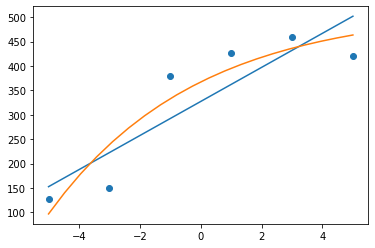

In [50]:
plt.plot(xq, y_linear)
plt.scatter(x,y)
plt.plot(xq, y_nonlinear)